# Data 201B Group Project 

## Project Name: Avocado Prices in the US Market
## Collaborators: Yi Lu, Sophia Zhang, Stella Zhou

#### Welcome to our Data 201B Group Project Jupyter notebook

#### In this project we will be analyzing avocado prices from a 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados from 2015-2018.
#### Our goal is to better understand the relationships between the various attributes and avocado prices.

#### Dataset source from: https://www.kaggle.com/neuromusic/avocado-prices

Questions <Br>
Which variables predominantly impact price? <Br>
Which avocado types are the most prominent, are there clusters to distinguish the types? <Br>
Does the price of avocados change seasonally or by year? <Br>
Are there difference in price in different regions of the US? <Br>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

#Importing ML models

# Regression
from sklearn.linear_model import*
from sklearn.ensemble import*
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [3]:
#load the data file
dt = pd.read_csv('avocado.csv') 

In [4]:
#Check the columns and variables
dt.head(10)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   
8           8  2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9  2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [5]:
#Look at dimensions of data
dt.shape

(18249, 14)

Defining the variables: <br>
1. Date - The date of the observation <br>
2. AveragePrice - the average price of a single avocado <br>
3. Total Volume - Total number of avocados sold (=4046+4225+4770+total bags) <br>
4. 4046 - Total number of avocados with PLU 4046 sold <br>
5. 4225 - Total number of avocados with PLU 4225 sold <br>
6. 4770 - Total number of avocados with PLU 4770 sold <br>
7. Total bags - Total number of avocados sold in bags (=small+large +XL) <br>
8. Small bags - Number of avocados sold in small bags <br>
9. Large bags - Number of avocados sold in large bags <br>
10. XL bags - Number of avocados sold in XL bags <br>
11. type - conventional or organic <br>
12. year - the year <br>
13. Region - the city or region of the observation <br>





In [6]:
#Check data types
dt.dtypes

#Need to change date to dttime
#Type to binary categorical

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
#Change to datetime
dt['Date'] = pd.to_datetime(dt['Date'])

dt.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [8]:
dt.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [9]:
dt.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
#Look at the unique regions
#There are aggregate regions for 'Midsouth', 'Northeast','SouthCentral', 'Southeast','West'
len(dt.region.unique())
dt.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [11]:
#Count how many rows of organic and conventional
print(dt['type'].value_counts())
#50% - 50%

conventional    9126
organic         9123
Name: type, dtype: int64


# Data Visualization

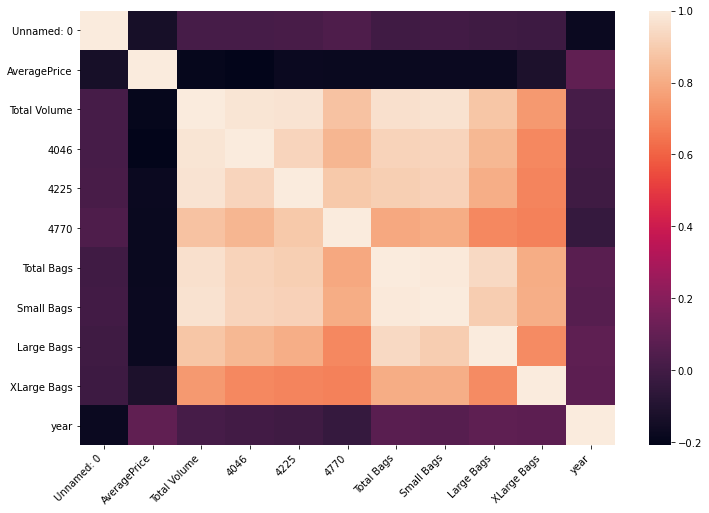

In [12]:
#High level heat map to display correlation
plt.figure(figsize = (12,8))
corrplot = sns.heatmap(dt.corr())
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right') #For X axis labels
plt.show()

Average price is generally negatively correlated or no correlation to other variables.
Price is only strongly positively correlated with the type of avocado, organic or conventional
Volumes, PLU code and bags are all counts of numbers of avocados (and sums of each other) therefore they are collinear

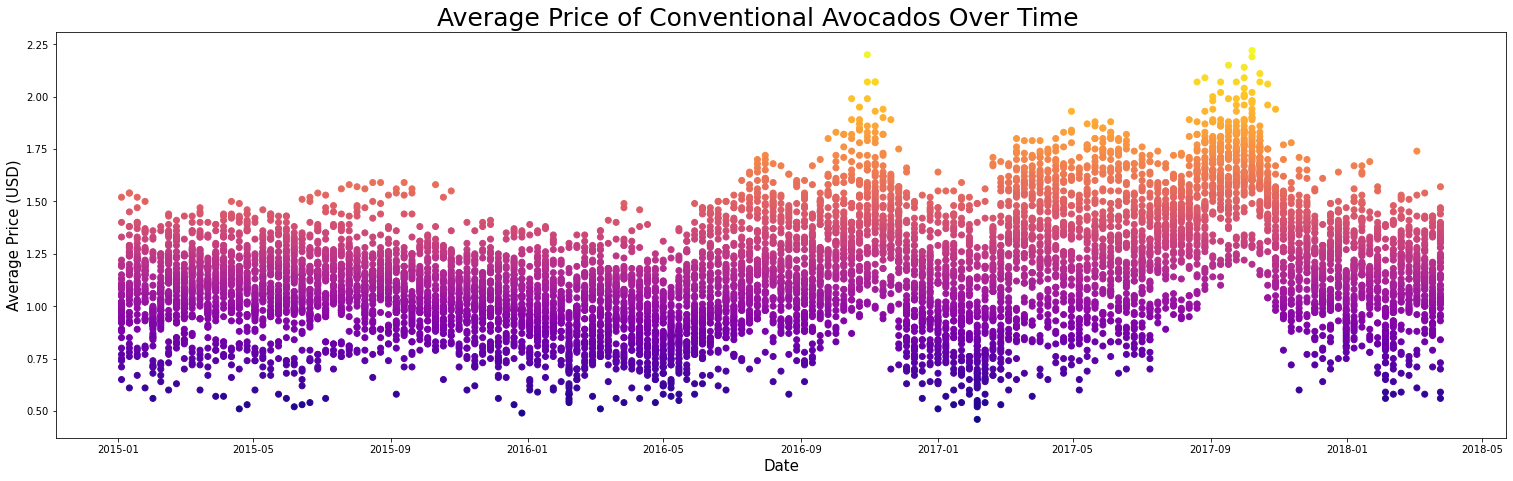

In [13]:
# Average price of Conventional Avocados over time

mask = dt['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = dt[mask]['Date'].tolist()
avgPrices = dt[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

Organic avocados show more steady price trend compared to conventional avocados, which show sharp decrease and increases in price in certain periods from 2016-2018.

Every point on this graph represents the average price of a different region at a specific date in time. Region variations are greatest in the fall.


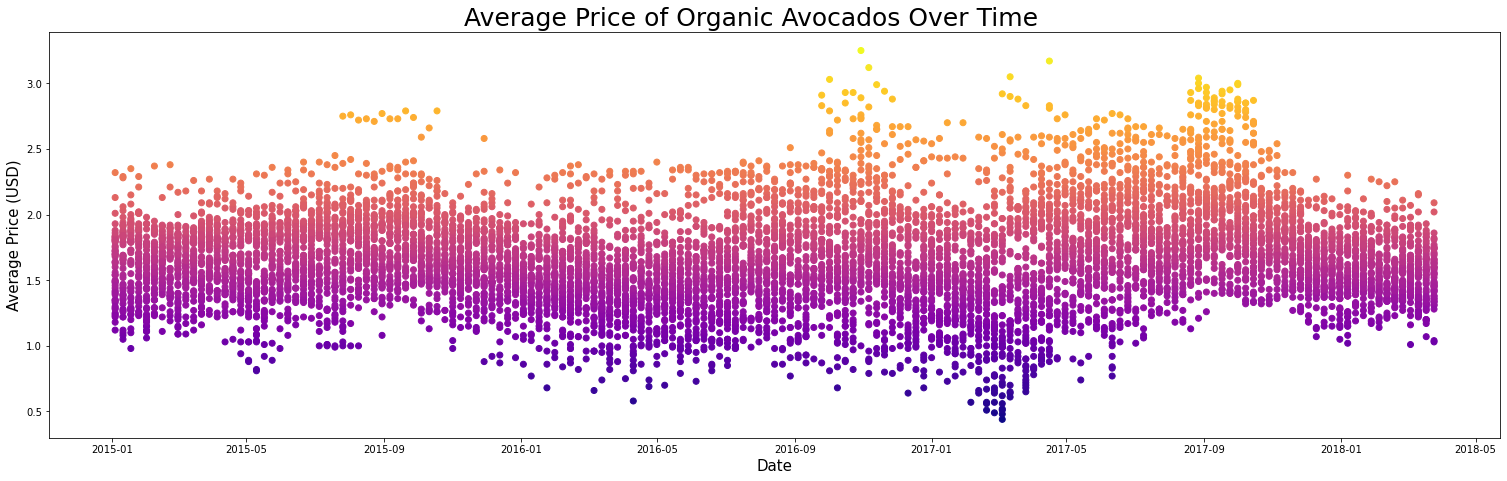

In [14]:
# Average price of Organic Avocados over time
mask = dt['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = dt[mask]['Date'].tolist()
avgPrices = dt[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

Over time, price in the US between the different types of avocados show a cyclic trend. Both organic and conventional avocados show a decrease in price in the summer months, and increases in the winter months.

In [15]:
import plotly.graph_objects as go

df_albany = dt[(dt['region'] == 'Albany')]
df_albany_con = df_albany[(df_albany['type'] == 'conventional')]
df_albany_org = df_albany[(df_albany['type'] == 'organic')]

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_albany_con['Date'].sort_values(), y=df_albany_con['AveragePrice'],marker_color="green",name="conventional"))
fig.add_trace(go.Scatter(x=df_albany_org['Date'].sort_values(), y=df_albany_org['AveragePrice'],marker_color="orange",name="organic"))


fig.show()

Over time, price in Albany between the different types of avocados are converging. Organic avocados are getting cheaper over time, and conventional avocados are becoming more expensive over time. 

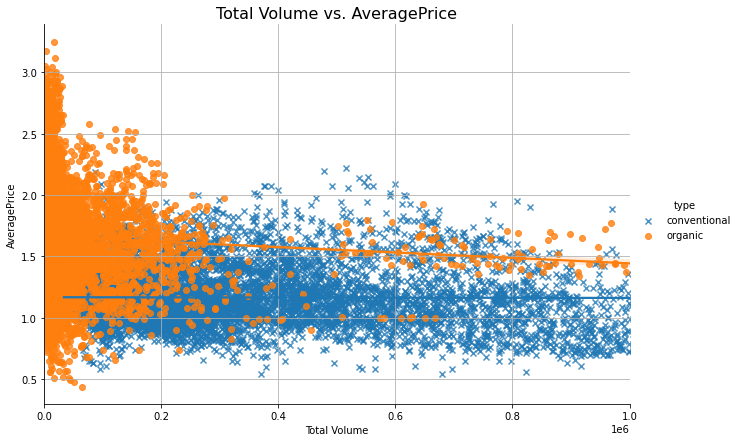

In [16]:
#Plot average price vs total volume
price_vol = sns.lmplot(x = 'Total Volume', y = 'AveragePrice', hue = 'type', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
price_vol.set(xlim = (0, 1000000)) #, ylim = (100, 450))
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Total Volume vs. AveragePrice', fontsize = 16)
plt.grid()
plt.show()

Average price for conventional avocados does not decrease relative to total volume

Price decreases as volume increases for organic avocados as expected in a normal supply-demand relationship. Indicating a possible scarcity condition.

# Regression

## Linear Regression

In [17]:
#Linear Regression

#Look at columns
print(dt.columns)

#Classifier for organic
#dt.loc[dt['type'] == 'conventional','type'] = 0
#dt.loc[dt['type'] == 'organic','type'] = 1

#Change to numeric
#dt['type']=pd.to_numeric(dt['type'])


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [18]:
#Split into feature and target datasets
X = dt.loc[:,['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']]
y = dt.loc[:,'AveragePrice']

#Create the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Encode the categorical variables

scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

<ipython-input-18-f272c72f5256>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-f272c72f5256>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
#Create model
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_tr1 = linreg.predict(X_train)
y_pr = linreg.predict(X_test)

#Calculate MSE
mse = mean_squared_error(y_test,y_pr)
r2 = r2_score(y_test,y_pr)

#R^2
print('The R^2 of the test set is: ' + str(r2))
#Accuracy
print('train data accuracy :',linreg.score(X_train,y_train))
print('test data accuracy :',linreg.score(X_test,y_test))
#MSE or Loss
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

The R^2 of the test set is: 0.41072629326191934
train data accuracy : 0.4054087688612493
test data accuracy : 0.41072629326191934
loss of train data : 0.0962768996169652
loss of test data : 0.09598476893519928


In [20]:
#Coefficients of Linear Model

coefficients = pd.DataFrame(linreg.coef_, X.columns)    
coefficients.columns = ['coefficients']
coefficients

coefficients
4046        -9.033843e-08
4225         1.111804e-07
4770        -4.345671e-07
Small Bags   1.617645e-08
Large Bags  -1.645553e-07
XLarge Bags  1.735204e-06
type         4.874730e-01
year         3.714483e-02
region       2.742592e-04

In [21]:
#Scatter Plot for Predicted vs Original Values 

test=X_test.copy()
test['y']=np.array(y_test)
test['ypred']=y_pr

#Classifier for organic

test.loc[test['type']==0,'avocado_type'] = 'conventional'
test.loc[test['type']== 1,'avocado_type'] = 'organic'

test

y_ypred = sns.lmplot(y = 'ypred', x = 'y', hue = 'avocado_type', data = test, markers=['x', 'o'], height = 6, aspect = 1.5)
y_ypred.set(xlim = (0.5, 3), ylim = (0.5, 3))
plt.xlabel('Actual Price $USD')
plt.ylabel('Predicted Price $USD')
plt.title('Linear Regression Predicted vs. Actual Average Price', fontsize = 16)
plt.grid()
plt.show()

Predictions for Average price for conventional avocados is typically lower than actual price, especially at higher actual prices.

Predictions for organic avocados is not very good, always predicts the same values.

Accuracy on test data = 41%

In [22]:
#Create empty lists to store model accuracy and MSE (loss)
actr=[]
acts=[]
lstr=[]
lsts=[]

#add the metrics
actr.append(linreg.score(X_train,y_train))
acts.append(linreg.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [23]:
#Regional linear regression
#'Midsouth', 'Northeast','SouthCentral', 'Southeast','West'
dt_reg=dt.loc[(dt['region']== 'Midsouth') | (dt['region']== 'Northeast') | (dt['region']== 'SouthCentral') | 
              (dt['region']== 'Southeast')| (dt['region']== 'West')]
dt_reg.dtypes

#Split into feature and target datasets
X = dt_reg.loc[:,['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']]
y = dt_reg.loc[:,'AveragePrice']
#Create the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Encode the categorical variables
scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])
        
#Create model
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pr = linreg.predict(X_test)

#Scatter Plot for Predicted vs Original Values 

test=X_test.copy()
test['y']=np.array(y_test)
test['ypred']=y_pr

#Classifier for organic
test.loc[test['type']==0,'avocado_type'] = 'conventional'
test.loc[test['type']== 1,'avocado_type'] = 'organic'
#Classifier for regions
#test.region.unique()
#'Midsouth', 'Northeast','SouthCentral', 'Southeast','West'
test.loc[test['region']==0,'Region'] = 'Midsouth'
test.loc[test['region']== 1,'Region'] = 'Northeast'
test.loc[test['region']==2,'Region'] = 'SouthCentral'
test.loc[test['region']== 3,'Region'] = 'Southeast'
test.loc[test['region']== 4,'Region'] = 'West'

plt.figure(figsize=(15,10))
y_ypred = sns.scatterplot(y = 'ypred', x = 'y',data=test,hue='Region')#,height=8.27, aspect=11.7/8.27)
y_ypred.set(xlim = (0.5, 3), ylim = (0.5, 3))
plt.xlabel('Actual Price $USD', fontsize = 16)
plt.ylabel('Predicted Price $USD', fontsize = 16)
plt.legend(fontsize = 16)
plt.title('Linear Regression Predicted vs. Actual Average Price', fontsize = 26)
plt.grid()
plt.show()

<ipython-input-23-6395da6c17b0>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-6395da6c17b0>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Predictions for Average price for Northeast is highest.
Predictions for South Central is lowest.

In [24]:
#Random Forest regression

#Split into feature and target datasets
X = dt.loc[:,['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']]
y = dt.loc[:,'AveragePrice']
#Create the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Encode the categorical variables
scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

#scale the data for better performance
cols=['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Combine into dataframe
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

clf=RandomForestRegressor(random_state=0)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

<ipython-input-24-b388b746ba88>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-b388b746ba88>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



train data accuracy : 0.978523935725235
test data accuracy : 0.846219550526943
loss of train data : 0.0034774291581615184
loss of test data : 0.02504876891780821


In [25]:
#Add the metrics for random forest
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [26]:
#Random forest plot
#Scatter Plot for Predicted vs Original Values 
test=X_test.copy()
test['y']=np.array(y_test)
test['ypred']=y_pr

#Classifier for organic
test.loc[test['type']<1,'avocado_type'] = 'conventional'
test.loc[test['type']> 1,'avocado_type'] = 'organic'

y_ypred = sns.lmplot(y = 'ypred', x = 'y', hue = 'avocado_type', data = test, markers=['x', 'o'], height = 6, aspect = 1.5)
y_ypred.set(xlim = (0.5, 3), ylim = (0.5, 3))
plt.xlabel('Actual Price $USD')
plt.ylabel('Predicted Price $USD')
plt.title('Random Forest Regression Predicted vs. Actual Average Price', fontsize = 16)
plt.grid()
plt.show()

Predictions using random forest regression is much better than linear regression 

Accuracy on test data = 85% 

Increased 107% from linear regression

In [27]:
#Ridge regression

#Split into feature and target datasets
X = dt.loc[:,['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']]
y = dt.loc[:,'AveragePrice']

#Create the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Encode the categorical variables
scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

#scale the data for better performance
cols=['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Combine into dataframe
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

clf=Ridge(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.405408768859558
test data accuracy : 0.41072629473855904
loss of train data : 0.09627689961723906
loss of test data : 0.09598476869467451


<ipython-input-27-475dfc9940b6>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-475dfc9940b6>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#Add the metrics for ridge regression
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [29]:
#Ridge Regression Plot
#Scatter Plot for Predicted vs Original Values 

test=X_test.copy()
test['y']=np.array(y_test)
test['ypred']=y_pr

#Classifier for organic

test.loc[test['type']<1,'avocado_type'] = 'conventional'
test.loc[test['type']> 1,'avocado_type'] = 'organic'

test

y_ypred = sns.lmplot(y = 'ypred', x = 'y', hue = 'avocado_type', data = test, markers=['x', 'o'], height = 6, aspect = 1.5)
y_ypred.set(xlim = (0.5, 3), ylim = (0.5, 3))
plt.xlabel('Actual Price $USD')
plt.ylabel('Predicted Price $USD')
plt.title('Ridge Regression Predicted vs. Actual Average Price', fontsize = 16)
plt.grid()
plt.show()

Predictions using ridge regression is similar to linear regression 

Accuracy on test data = 41% 

No change from linear regression

In [30]:
#Lasso regression

#Split into feature and target datasets
X = dt.loc[:,['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']]
y = dt.loc[:,'AveragePrice']
#Create the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Encode the categorical variables
scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])
        
#scale the data for better performance
cols=['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','type','year','region']
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Combine into dataframe
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

clf=Lasso(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.38968679698866915
test data accuracy : 0.39598367340337237
loss of train data : 0.09882261948043883
loss of test data : 0.0983861436180359


<ipython-input-30-471dbd1b2278>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-471dbd1b2278>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
#Add the metrics for lasso regression
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

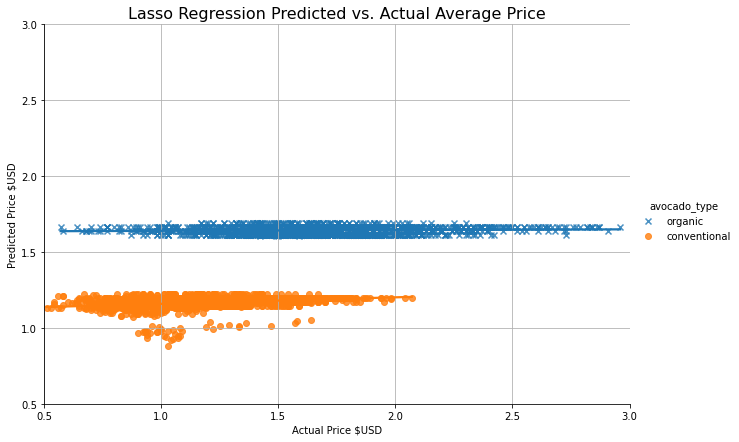

In [32]:
#Lasso Regression Plot
#Scatter Plot for Predicted vs Original Values 

test=X_test.copy()
test['y']=np.array(y_test)
test['ypred']=y_pr

#Classifier for organic

test.loc[test['type']<1,'avocado_type'] = 'conventional'
test.loc[test['type']> 1,'avocado_type'] = 'organic'

test

y_ypred = sns.lmplot(y = 'ypred', x = 'y', hue = 'avocado_type', data = test, markers=['x', 'o'], height = 6, aspect = 1.5)
y_ypred.set(xlim = (0.5, 3), ylim = (0.5, 3))
plt.xlabel('Actual Price $USD')
plt.ylabel('Predicted Price $USD')
plt.title('Lasso Regression Predicted vs. Actual Average Price', fontsize = 16)
plt.grid()
plt.show()

Predictions using lasso regression is worse than linear regression 

Accuracy on test data = 40% 

Decreased 1% from linear regression


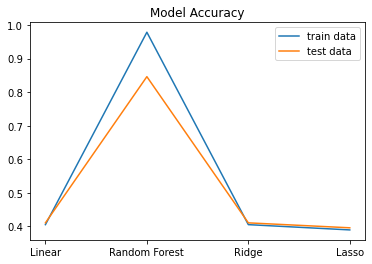

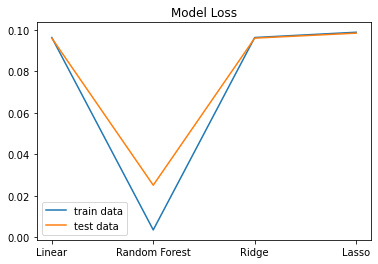

In [33]:
#Plot the model metrics

models=['Linear','Random Forest','Ridge','Lasso']
plt.title('Model Accuracy')
plt.plot(models,actr,label='train data')
plt.plot(models,acts,label='test data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(models,lstr,label='train data')
plt.plot(models,lsts,label='test data')
plt.legend()
plt.show()

Best regression for price prediction is Random Forest

All others show similar accuracy and MSE

### Logistic Regresson

In [34]:
#Logistic Regression
#Predict type of avocado

#Split into feature and target datasets
X = dt.loc[:,['AveragePrice','4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags','year']]
y = dt.loc[:,'type']

#Create the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Encode the categorical variables
scaler=LabelEncoder()
for col in X_train.columns:
    if dt[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)
        
#Instantiating the LogisticRegression Object
logreg = LogisticRegression()
#Fitting the model on our training data using fit method
logreg.fit(X_train, y_train)
#Making predictions on Testing Model
y_pred = logreg.predict(X_test)

In [35]:
#Creating Confusion Matrix to evaluate the model

cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Prediction of Avocado Type using Average Price, PLU code, number of bags sold, and year:

The accuracy of the model = 93%

Specificity or True Negative Rate = 89 %

Sensitivity or True Positive Rate = 97%

In [36]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

#accuracy= (TP+TN)/(TP+TN+FP+FN)
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),3))

#specificity= TN/(TN+FP)
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

#sensitivity=TP/(TP+FN) (True Positive Rate)
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.933
Specificity or True Negative Rate = TN/(TN+FP) =  0.893
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.973


In [37]:
### ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for Avocado type classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

### K Nearest Neighbors

In [38]:
# KNN - Classification by type

feature_columns = ['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
X = dt[feature_columns].values
y = dt['type'].values

le = LabelEncoder()
y = le.fit_transform(y)
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# First learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

Accuracy of our model is equal to 97.64%
[[1740   35]
 [  51 1824]]


<Figure size 432x288 with 0 Axes>

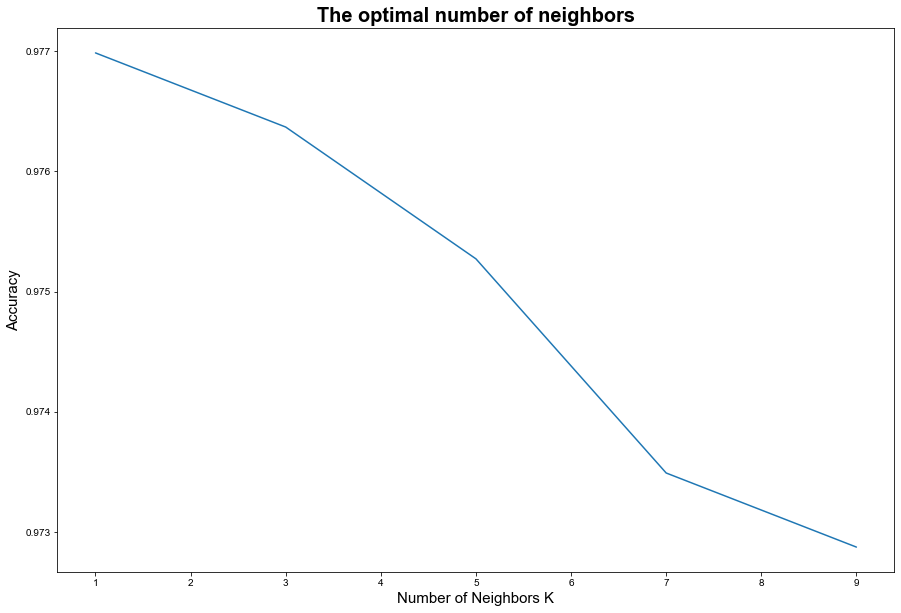

In [39]:
# KNN Cross Validation - Type with plot

#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,10,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())


# Plotting average Accuracy for all number of neighbors
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()


First, we looked at avocado type. 
By using KNN, our accuracy seems even better. With logistic regression, our overall accuracy is 93%, and by using KNN our accuracy is 97.64%. 

The graph here shows that the optimal number of neighbors in this algorithm is when the number of neighbors is 1, and as the number of neighbors increase we will have less accuracy of the model. 
Due to the result, we can draw conclusion that different types of avocado does make a difference in price and volume of sales. 


In [40]:
# dt['Date'] = pd.to_datetime(dt['Date'])
dt['year'] = dt.Date.dt.year
dt['month'] = dt.Date.dt.month

Accuracy of our model is equal to 67.97%
[[960 105  45   7]
 [233 702 176  21]
 [126 255 750  44]
 [  8  34 115  69]]


<Figure size 432x288 with 0 Axes>

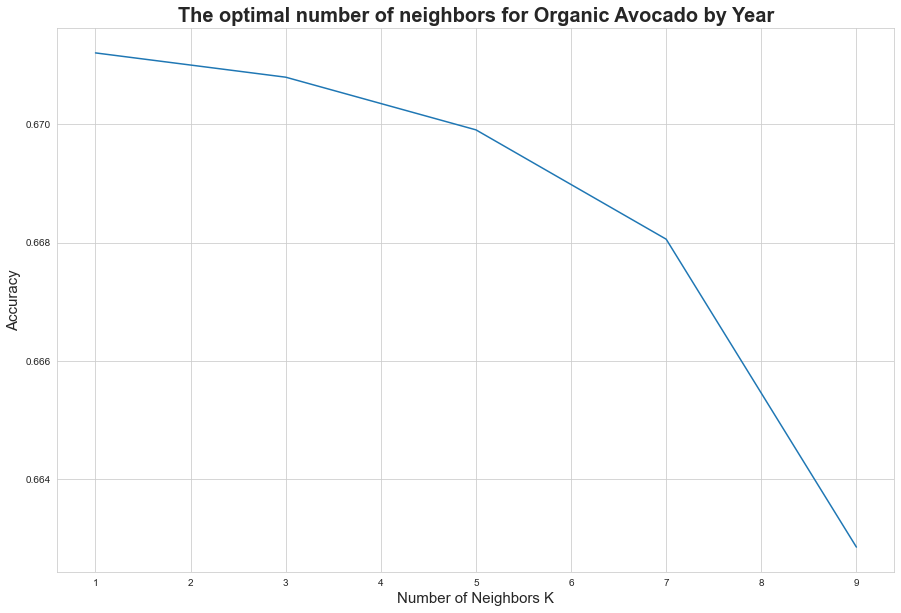

In [41]:
# KNN by Year with all region

feature_columns = ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
X = dt[feature_columns].values
y = dt['year'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# First learning model (k = 4)
classifier = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

# KNN Cross Validation

#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,10,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors for Organic Avocado by Year', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()


Next, we used KNN of grouping year. We want to know whether selling avocado in a different year will make a difference.

It seems that there is somewhat relation between year and the average price, and the volumes of avocado being sold. 

Two of the possible reasons why we have such low accuracy is probably instead of doing one type of avocado, we did two types and we have used all regions. 

In [42]:
dt.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  month  
0  2015  Albany     12  
1  2015  Albany     12  
2  2015  Albany     12  
3  2015  Albany     12  
4  2015  Albany     11

In [43]:
df_con = dt[(dt['type'] == 'conventional')]
df_org = dt[(dt['type'] == 'organic')]

df_org = df_org[(df_org['region'] == 'TotalUS')]
df_con = df_con[(df_con['region'] == 'TotalUS')]

Accuracy of our model is equal to 91.18%
[[ 8  0  0  0]
 [ 1 11  0  0]
 [ 0  2 10  0]
 [ 0  0  0  2]]


<Figure size 432x288 with 0 Axes>

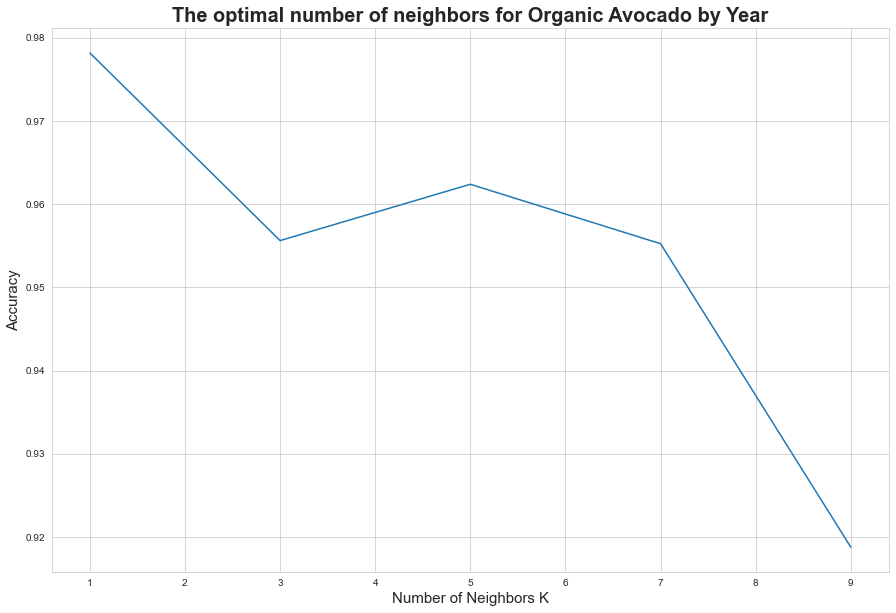

In [44]:
# KNN by year with only organic avocado with Total US as region

feature_columns = ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
X = df_org[feature_columns].values
y = df_org['year'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# First learning model (k = 4)
classifier = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

# KNN Cross Validation

#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,10,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors for Organic Avocado by Year', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

Then we looked at the dataset only on Organic Avocado with total US. And undoubtably  we have a higher Accuracy. 

Thus, price and volume does change over year to year. 


In [45]:
# KNN - Classification by Month

feature_columns = ['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
X = dt[feature_columns].values
y = dt['month'].values

le = LabelEncoder()
y = le.fit_transform(y)
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# First learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

Accuracy of our model is equal to 18.27%
[[140  73  32  25  22   8  10  12  15   9   7  13]
 [ 95  56  55  17  24   8   3   8   1   8   6   5]
 [ 90  94  85  35  15   5   7   7   5   7   2   3]
 [ 49  53  67  48  41  17   9   8   5   4   4   4]
 [ 56  46  40  42  55  29  14   4   4   2   7   5]
 [ 40  32  30  41  37  57  21   4   4   2   5   1]
 [ 49  36  35  34  23  32  50  21  10   4   7   3]
 [ 49  35  33  20  20  17  42  41  18   8   6   7]
 [ 47  27  22  19  11  16  13  43  33  21   3   7]
 [ 64  34  18  11  22  14  22  16  33  48  31  10]
 [ 67  34  21  18   7   4  17  20  19  31  31  24]
 [ 70  35  21  16  15   6  16  14  14  20  28  23]]


In [46]:
# KNN - Classification by Month


df_org.loc[df_org['month'].isin([1, 2, 3, 4, 5, 6]) , 'test'] = '1'
df_org.loc[df_org['month'].isin([7, 8, 9, 10, 11, 12]) , 'test'] = '0'


feature_columns = ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
X = df_org[feature_columns].values
y = df_org['test'].values

le = LabelEncoder()
y = le.fit_transform(y)
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# First learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)


#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,10,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)

Accuracy of our model is equal to 82.35%
[[12  2]
 [ 4 16]]


<Figure size 432x288 with 0 Axes>


Finally, we look at the month. Again, the dataset only has Organic Avocado with total US as region. 

If anyone remember the scatter plot we shown in the beginning, there is somewhat trend that shows a higher average price on avocado in September to November period.  The result of low accuracy surprised me. And the possible reason is due to there are so 12 we are classify. So instead of 12 month, or 12 labels, we reduced to only 2 labels. And 0 indicates months from Jan to June, 1 indicates July to Dec.

This is the result we got, and the accuracy is much higher than what we get previously, from the high accuracy, we can conclude that we can cluster price and volume sold during different time of the year. 

### Principal Component Analysis (PCA)

In [47]:
dt['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [48]:
df_2015_new = dt.loc[dt['year'].isin(['2015'])]

In [49]:
df_2015=df_2015_new.drop(columns = ['Total Volume','Total Bags','Date', 'Unnamed: 0','region'])

In [50]:
df_2015.loc[df_2015['type'] == 'conventional','type'] = 0
df_2015.loc[df_2015['type'] == 'organic','type'] = 1
df_2015

AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0              1.33  1036.74   54454.85   48.16     8603.62       93.25   
1              1.35   674.28   44638.81   58.33     9408.07       97.49   
2              0.93   794.70  109149.67  130.50     8042.21      103.14   
3              1.08  1132.00   71976.41   72.58     5677.40      133.76   
4              1.28   941.48   43838.39   75.78     5986.26      197.69   
...             ...      ...        ...     ...         ...         ...   
11928          1.77  1634.42    3012.44    0.00     2563.33        0.00   
11929          1.63  1934.46    3032.72    0.00     2320.00       36.88   
11930          1.71  1793.64    2078.72    0.00     1620.00       15.84   
11931          1.69  1822.28    2377.54    0.00     2656.66        5.25   
11932          1.64  1561.30    2958.17    0.00     1663.34        0.00   

       XLarge Bags type  year  month  
0              0.0    0  2015     12  
1              0.0    0  2015     12  
2              0.0    0  2015     12  
3              0.0    0  2015     12  
4              0.0    0  2015     11  
...            ...  ...   ...    ...  
11928          0.0    1  2015      2  
11929          0.0    1  2015      1  
11930          0.0    1  2015      1  
11931          0.0    1  2015      1  
11932          0.0    1  2015      1  

[5615 rows x 10 columns]

In [51]:
scaler = StandardScaler()
scaler.fit(df_2015)

StandardScaler()

In [52]:
scaled_data = scaler.transform(df_2015)
scaled_data

array([[-0.12139265, -0.23157894, -0.20306022, ..., -0.99982192,
         0.        ,  1.60206187],
       [-0.06813903, -0.23185559, -0.21075084, ..., -0.99982192,
         0.        ,  1.60206187],
       [-1.18646505, -0.23176368, -0.16020821, ..., -0.99982192,
         0.        ,  1.60206187],
       ...,
       [ 0.89042613, -0.23100123, -0.2440956 , ...,  1.00017811,
         0.        , -1.61273188],
       [ 0.83717251, -0.23097937, -0.24386149, ...,  1.00017811,
         0.        , -1.61273188],
       [ 0.70403846, -0.23117856, -0.24340658, ...,  1.00017811,
         0.        , -1.61273188]])

In [53]:
pca = PCA(n_components = 2)

In [54]:
pca.fit(scaled_data)

PCA(n_components=2)

In [55]:
components = pca.transform(scaled_data)

In [56]:
scaled_data.shape

(5615, 10)

In [57]:
components.shape

(5615, 2)

In [58]:
pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "region", df_2015_new["region"].values, True)
pca_values_df

region  Principal Component 1  Principal Component 2
0               Albany              -0.339199              -0.847862
1               Albany              -0.349505              -0.811511
2               Albany              -0.166116              -1.581707
3               Albany              -0.238798              -1.308140
4               Albany              -0.327489              -0.947691
...                ...                    ...                    ...
5610  WestTexNewMexico              -0.854073               1.272899
5611  WestTexNewMexico              -0.801969               1.008243
5612  WestTexNewMexico              -0.834127               1.155530
5613  WestTexNewMexico              -0.825332               1.118864
5614  WestTexNewMexico              -0.806758               1.026497

[5615 rows x 3 columns]

In [59]:
list_region = ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

mean_pc1 = []
mean_pc2 = []

for i in list_region:
    
    pc1_value = pca_values_df.loc[pca_values_df.region.shift() == i, 'Principal Component 1'].mean()
    mean_pc1.append(pc1_value)
print(mean_pc1)

for i in list_region:
    
    pc2_value = pca_values_df.loc[pca_values_df.region.shift() == i, 'Principal Component 2'].mean()
    mean_pc2.append(pc2_value)
print(mean_pc2)



[-0.5869173108359006, -0.4210088135236536, -0.26991765116982813, -0.5198947573915018, -0.4602914039812258, -0.5310371509413552, 1.0880245616309219, -0.4868625082455341, -0.18815399311106337, -0.30512341940894516, -0.3784647421456838, -0.13928949459358345, -0.0826398142338325, -0.11005269254487217, -0.3922054442545303, 1.557252045503185, -0.5209840260790453, -0.5893202844884127, -0.093642251118136, -0.4052337319528171, -0.5380387546427955, -0.4296912257295849, 0.3524557413036984, -0.44896478133409057, -0.36787411257896213, 0.5812283418830555, -0.43607413127397143, -0.4274229029941623, -0.2260379821446901, 0.47648609987168417, -0.4923178904819317, -0.4859965964140715, -0.48688164075202534, -0.2214255380978341, -0.5087676307502792, -0.12425669651412428, -0.34900391786709356, -0.42854665752792265, -0.4303256586153712, -0.45273247072928957, -0.4680662054681346, -0.3663749473917405, -0.4419461332280601, -0.4015582035699683, -0.38329892495696744, 1.0737155635636848, 0.5191910448961133, -0.528

In [60]:
pca_values_df_mean = pd.DataFrame(
    {'PC1': mean_pc1,
     'PC2': mean_pc2,
     'region': list_region
    })

In [61]:
pca_values_df_mean

PC1       PC2               region
0   -0.586917  0.183887               Albany
1   -0.421009 -0.084436              Atlanta
2   -0.269918 -0.084844  BaltimoreWashington
3   -0.519895 -0.100219                Boise
4   -0.460291  0.094825               Boston
5   -0.531037  0.204575     BuffaloRochester
6    1.088025  0.113259           California
7   -0.486863  0.276932            Charlotte
8   -0.188154  0.013878              Chicago
9   -0.305123 -0.390094     CincinnatiDayton
10  -0.378465 -0.279755             Columbus
11  -0.139289 -0.601271        DallasFtWorth
12  -0.082640 -0.372527               Denver
13  -0.110053 -0.076995              Detroit
14  -0.392205 -0.004412          GrandRapids
15   1.557252  0.285610           GreatLakes
16  -0.520984  0.092800   HarrisburgScranton
17  -0.589320  0.565294  HartfordSpringfield
18  -0.093642 -0.644194              Houston
19  -0.405234 -0.139660         Indianapolis
20  -0.538039  0.130524         Jacksonville
21  -0.429691 -0.118450             LasVegas
22   0.352456 -0.344924           LosAngeles
23  -0.448965 -0.255515           Louisville
24  -0.367874 -0.062541    MiamiFtLauderdale
25   0.581228  0.076940             Midsouth
26  -0.436074 -0.284203            Nashville
27  -0.427423 -0.288075     NewOrleansMobile
28  -0.226038  0.467121              NewYork
29   0.476486  0.422685            Northeast
30  -0.492318  0.080175   NorthernNewEngland
31  -0.485997  0.136252              Orlando
32  -0.486882  0.232672         Philadelphia
33  -0.221426 -0.462991        PhoenixTucson
34  -0.508768 -0.047582           Pittsburgh
35  -0.124257  0.081734               Plains
36  -0.349004 -0.198334             Portland
37  -0.428547  0.048344    RaleighGreensboro
38  -0.430326 -0.288657      RichmondNorfolk
39  -0.452732 -0.376043              Roanoke
40  -0.468066  0.048245           Sacramento
41  -0.366375 -0.267090             SanDiego
42  -0.441946  0.372216         SanFrancisco
43  -0.401558  0.005451              Seattle
44  -0.383299  0.064105        SouthCarolina
45   1.073716 -0.288098         SouthCentral
46   0.519191  0.173612            Southeast
47  -0.528849 -0.073044              Spokane
48  -0.546528  0.143231              StLouis
49  -0.585188  0.166100             Syracuse
50  -0.113323 -0.058097                Tampa
51  10.373658  1.960405              TotalUS
52   1.428170  0.030027                 West
53  -0.281808 -0.276003     WestTexNewMexico

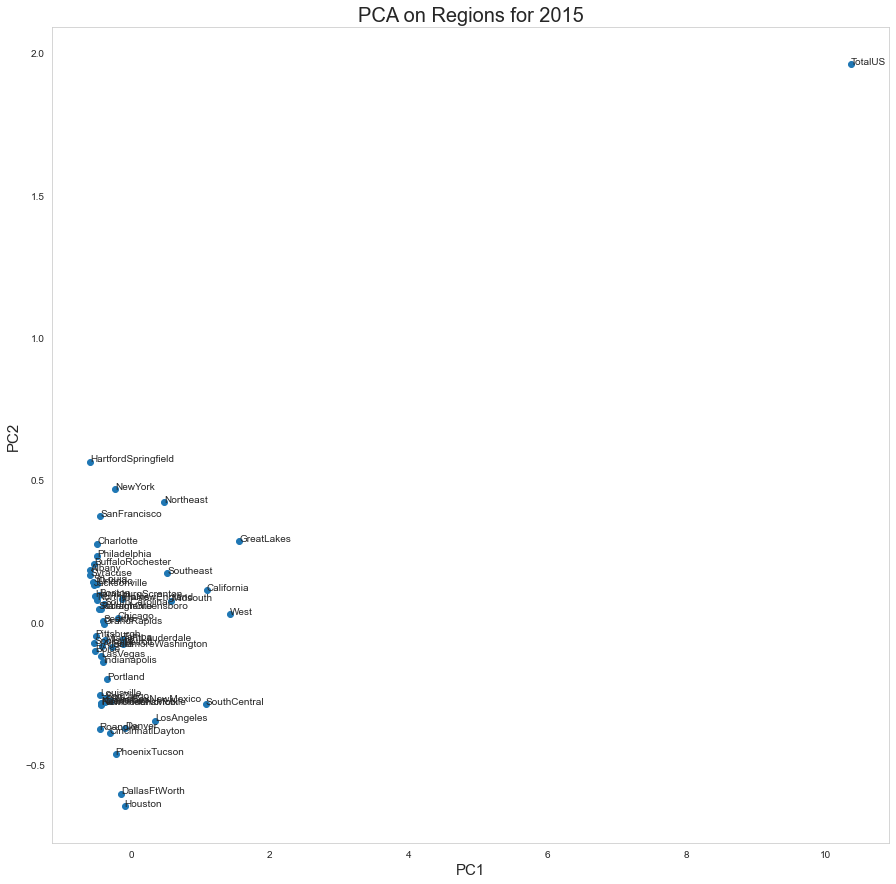

In [62]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA on Regions for 2015', fontsize = 20)

plt.scatter(pca_values_df_mean['PC1'], pca_values_df_mean['PC2'])

n = pca_values_df_mean['region'].values.copy()
x = pca_values_df_mean['PC1'].values.copy()
y = pca_values_df_mean['PC2'].values.copy()


for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    
ax.grid()

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

scaler = StandardScaler()
scaler.fit(df_2015)
scaled_data = scaler.transform(df_2015)

pca = PCA(n_components = 3)
pca.fit(scaled_data)
components3 = pca.transform(scaled_data)
result = pd.DataFrame(data = components3, columns = ['PCA0', 'PCA1','PCA2'])
result.insert(0, "region", df_2015_new["region"].values, True)
result


region      PCA0      PCA1      PCA2
0               Albany -0.339199 -0.847862  1.607361
1               Albany -0.349505 -0.811511  1.606922
2               Albany -0.166116 -1.581707  1.619968
3               Albany -0.238798 -1.308140  1.615976
4               Albany -0.327489 -0.947691  1.322473
...                ...       ...       ...       ...
5610  WestTexNewMexico -0.854073  1.272899 -1.322754
5611  WestTexNewMexico -0.801969  1.008243 -1.604998
5612  WestTexNewMexico -0.834127  1.155530 -1.607765
5613  WestTexNewMexico -0.825332  1.118864 -1.607147
5614  WestTexNewMexico -0.806758  1.026497 -1.605280

[5615 rows x 4 columns]

In [64]:
i = result[(result['region'] =='Midsouth')].index
midsouth = result.iloc[i]

j = result[(result['region'] =='Northeast')].index
northeast = result.iloc[j]

k = result[(result['region'] =='SouthCentral')].index
southcentral = result.iloc[k]

l = result[(result['region'] =='Southeast')].index
southeast = result.iloc[l]

m = result[(result['region'] =='West')].index
west = result.iloc[m]

df_geo = pd.concat([midsouth, northeast, southcentral, southeast, west], ignore_index=True)

In [65]:
import plotly.express as px

fig = px.scatter_3d(df_geo, x='PCA0', y='PCA1', z='PCA2',color = 'region',
                    title="3D Scatter Plot")
fig.show()

## Lessons Learned

Price varies by month and can be separated into two groups. Data from January to June forms a cluster and data from July to December forms a cluster.
The southcentral region of the US show distinct differences to the rest of the US. The prices in this region is much lower. This may be due to it being located near avocado production zones.
Avocado type is a strong factor variable. Predictions should be applied separately based on type of avocado. Otherwise, the train dataset are noisy and predictions have very low accuracy.
Random forest regression best predicts numerical price. For classifying avocado type, KNN has higher accuracy than Logistic Regression. PCA suitable for seeing patterns in regions.


## Future Work

Investigate factors that influence price from January to June that distinguishes it from July to December. Can use these factors to influence the price.
The southcentral region may be used as a baseline point for price predictions, as it is consistently lower in price from other regions. Can use it to look at minimum expected price.
Different approaches to price prediction or classification should be applied to organic and conventional avocados. They should be treated as entirely different commodities from a business perspective.
More variables are needed to accurately predict price, the variables in this dataset are primarily for volume of avocados sold and location.


## Conclusions
Random forest model is best for price prediction
Logistic regression and KNN show similar accuracy for classifying type of avocado while PCA highlights regional differences.
Seasonal Impacts on avocado prices; prices are higher in the fall and less expensive in the spring.
Organic avocados have larger price fluctuations and low supply.
Wide range of prices over different regions. Southcentral and West tend to have lower prices.
